In [26]:
!wget -O diabetes.csv https://raw.githubusercontent.com/Jeremias333/analysis-comparative-effectiveness-of-classification-algorithms-in-predicting-diabetes/master/dataset-diabetes.csv

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.combine import SMOTEENN
from collections import defaultdict

df = pd.read_csv("diabetes.csv")

# Padronizar nomes de colunas
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")

print("Colunas disponíveis:")
print(df.columns.tolist())

# Visualizar os nomes das colunas
print("Colunas disponíveis:")
print(df.columns.tolist())

# Padronizar nomes de colunas (opcional, mas recomendado)
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")

# ==========================
# 1. Verificar valores ausentes
# ==========================
print("\n🔍 Valores ausentes por coluna:")
print(df.isnull().sum())

# ==========================
# 2. Verificar valores duplicados
# ==========================
duplicados = df.duplicated()
print(f"\n🔁 Total de linhas duplicadas: {duplicados.sum()}")
if duplicados.any():
    print("Exemplos de duplicatas:")
    print(df[duplicados].head())

# ==========================
# 3. Detectar outliers (via IQR)
# ==========================
print("\n📊 Outliers por coluna (baseado em IQR):")
outlier_summary = {}
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    outlier_summary[col] = len(outliers)
    print(f"{col}: {len(outliers)} outliers")

# Estatísticas básicas
print("\n📈 Estatísticas descritivas:")
display(df.describe())



--2025-06-04 08:30:17--  https://raw.githubusercontent.com/Jeremias333/analysis-comparative-effectiveness-of-classification-algorithms-in-predicting-diabetes/master/dataset-diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49511 (48K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  48.35K  --.-KB/s    in 0s      

2025-06-04 08:30:17 (120 MB/s) - ‘diabetes.csv’ saved [49511/49511]

Colunas disponíveis:
['ID', 'NO_PATION', 'GENDER', 'AGE', 'UREA', 'CR', 'HBA1C', 'CHOL', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS']
Colunas disponíveis:
['ID', 'NO_PATION', 'GENDER', 'AGE', 'UREA', 'CR', 'HBA1C', 'CHOL', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS']

🔍 Valores ausentes por coluna:
ID           0
NO_PATION    0
GEND

,ID,NO_PATION,AGE,UREA,CR,HBA1C,CHOL,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


<ipython-input-27-123a0d35f11a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_pct.index, y=class_pct.values, palette="Blues")


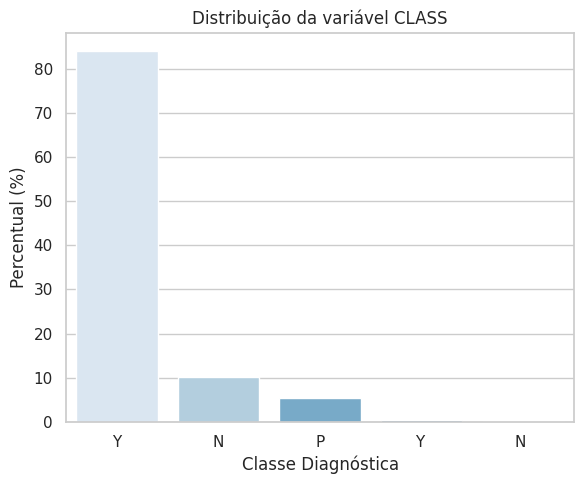

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

if "CLASS" in df.columns:
    plt.figure(figsize=(6, 5))
    class_pct = df["CLASS"].value_counts(normalize=True) * 100
    sns.barplot(x=class_pct.index, y=class_pct.values, palette="Blues")
    plt.ylabel("Percentual (%)")
    plt.xlabel("Classe Diagnóstica")
    plt.title("Distribuição da variável CLASS")
    plt.tight_layout()
    plt.show()
else:
    print("Coluna 'CLASS' não encontrada no dataset.")


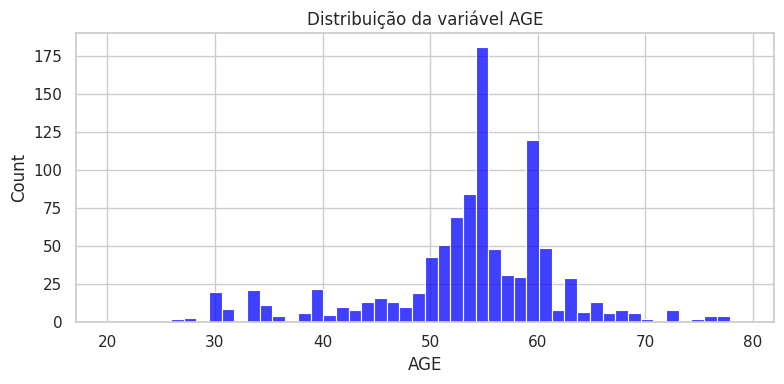

In [28]:
plt.figure(figsize=(8, 4))
sns.histplot(df["AGE"], bins=50, color='blue')
plt.title("Distribuição da variável AGE")
plt.xlabel("AGE")
plt.tight_layout()
plt.show()


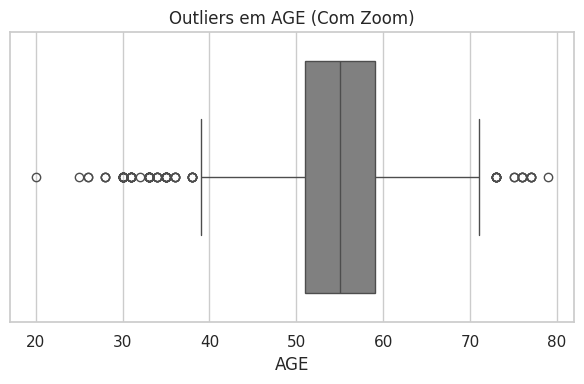

In [29]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["AGE"], color="gray")
plt.title("Outliers em AGE (Com Zoom)")
plt.tight_layout()
plt.show()


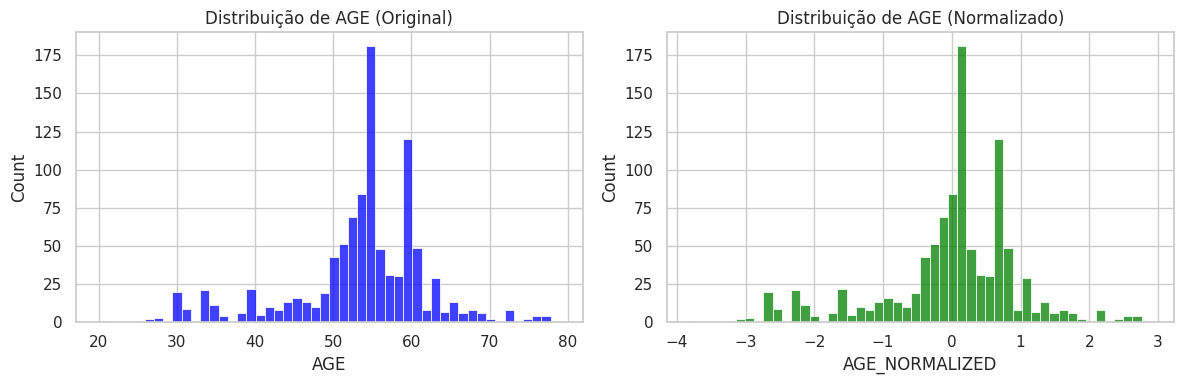

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["AGE_NORMALIZED"] = scaler.fit_transform(df[["AGE"]])

# Histograma original vs normalizado
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df["AGE"], bins=50, color='blue')
plt.title("Distribuição de AGE (Original)")
plt.subplot(1, 2, 2)
sns.histplot(df["AGE_NORMALIZED"], bins=50, color='green')
plt.title("Distribuição de AGE (Normalizado)")
plt.tight_layout()
plt.show()


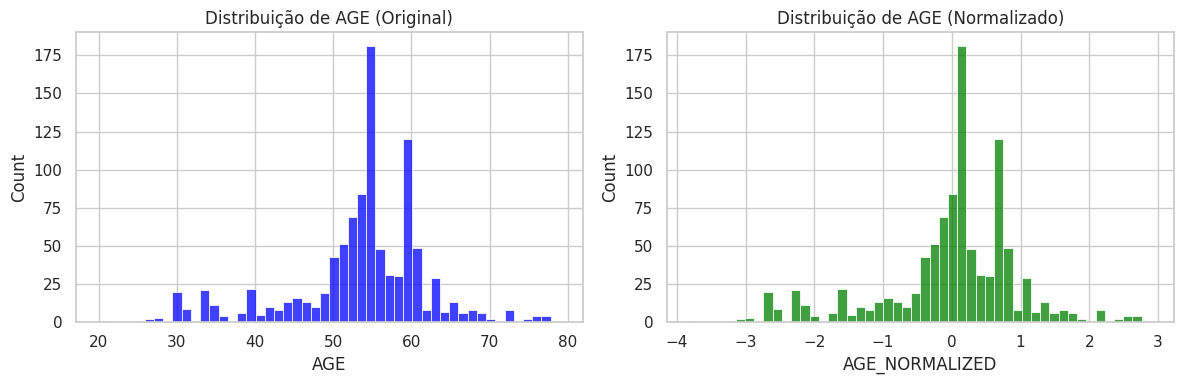

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["AGE_NORMALIZED"] = scaler.fit_transform(df[["AGE"]])

# Histograma original vs normalizado
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df["AGE"], bins=50, color='blue')
plt.title("Distribuição de AGE (Original)")
plt.subplot(1, 2, 2)
sns.histplot(df["AGE_NORMALIZED"], bins=50, color='green')
plt.title("Distribuição de AGE (Normalizado)")
plt.tight_layout()
plt.show()


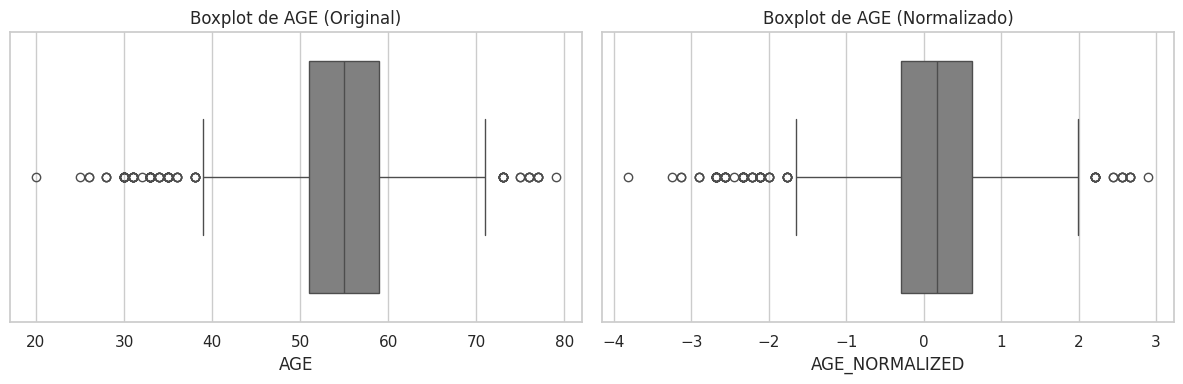

In [32]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df["AGE"], color="gray")
plt.title("Boxplot de AGE (Original)")
plt.subplot(1, 2, 2)
sns.boxplot(x=df["AGE_NORMALIZED"], color="gray")
plt.title("Boxplot de AGE (Normalizado)")
plt.tight_layout()
plt.show()


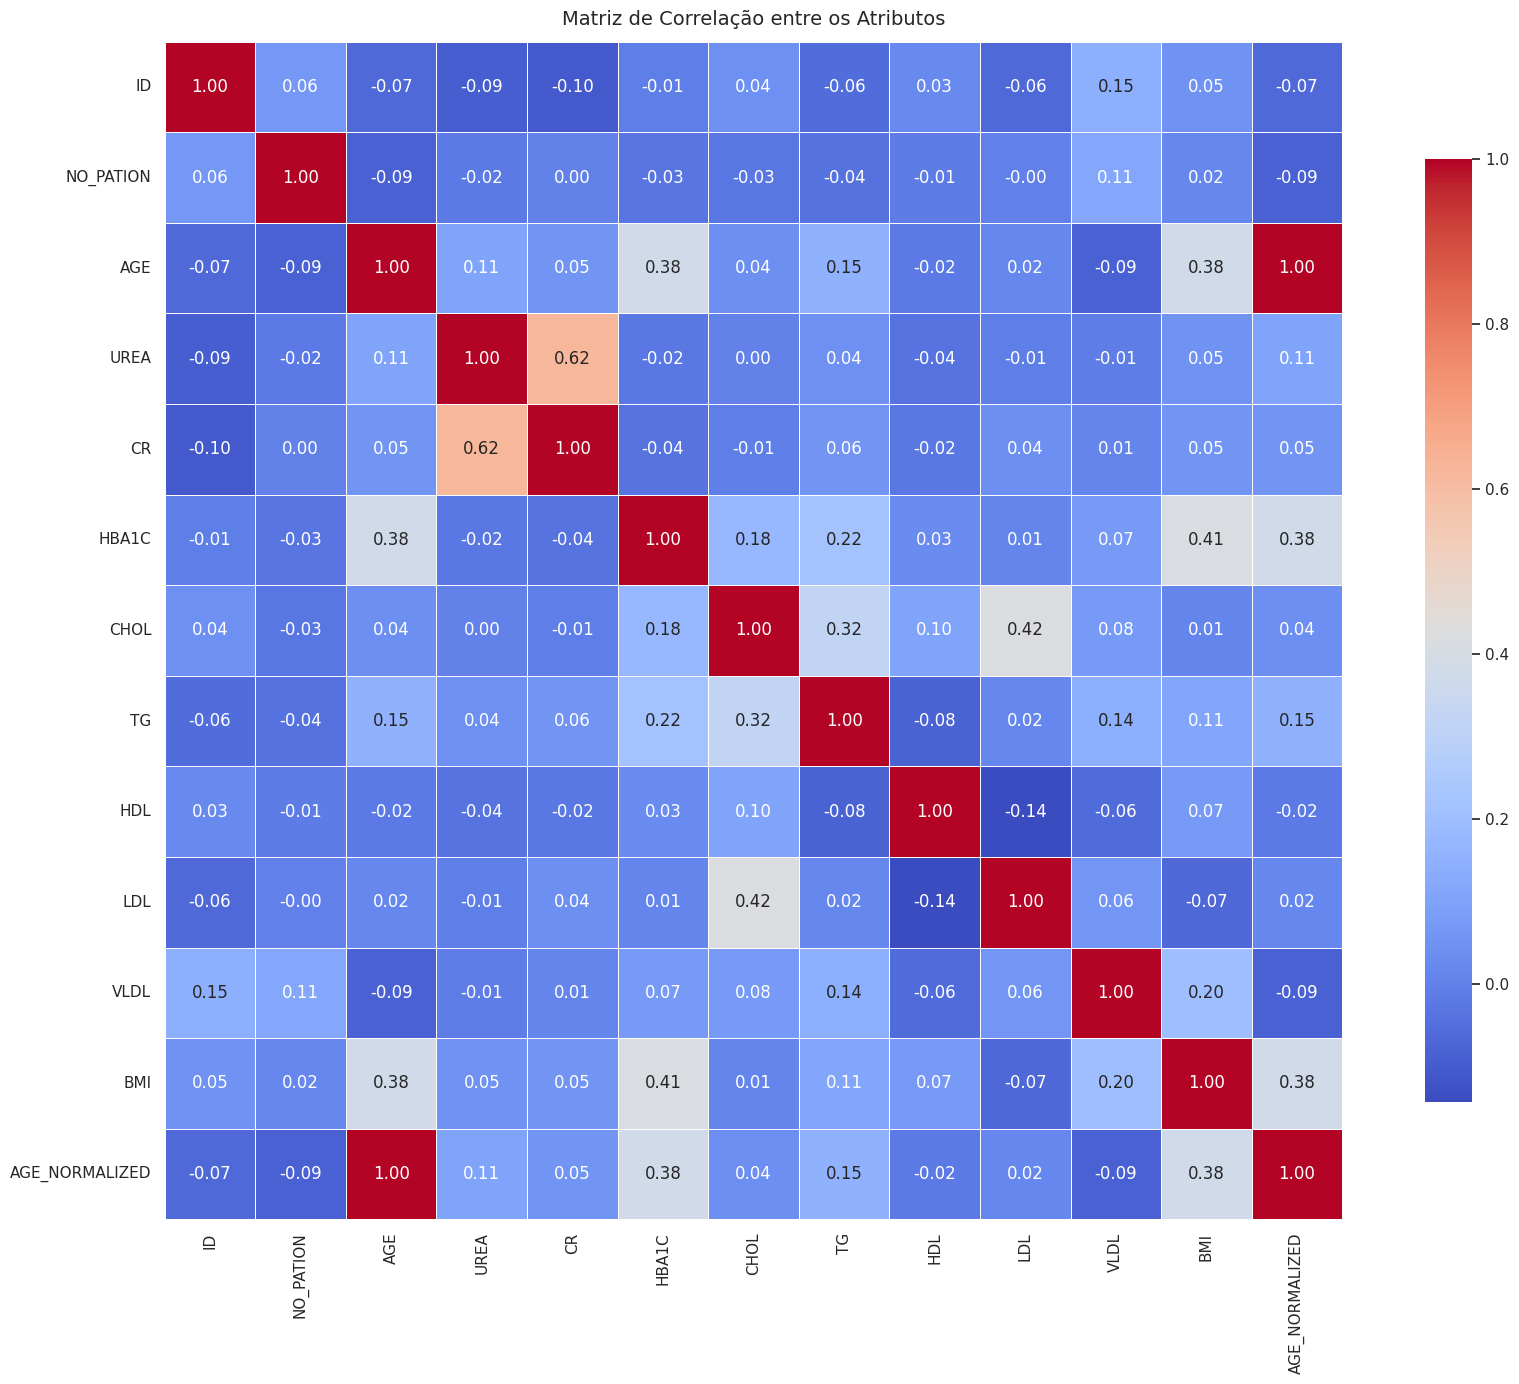

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra apenas colunas numéricas
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calcula a matriz de correlação
correlation_matrix = numeric_df.corr()

# Cria o heatmap com os valores nas células
plt.figure(figsize=(18, 14))  # aumenta a figura para caber todos os rótulos
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    square=True
)

plt.title("Matriz de Correlação entre os Atributos", fontsize=14, pad=12)
plt.tight_layout()
plt.show()


✅ Nenhum valor ausente encontrado no dataset.


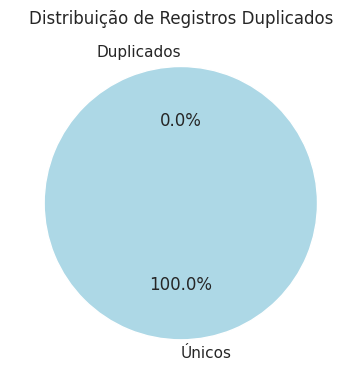

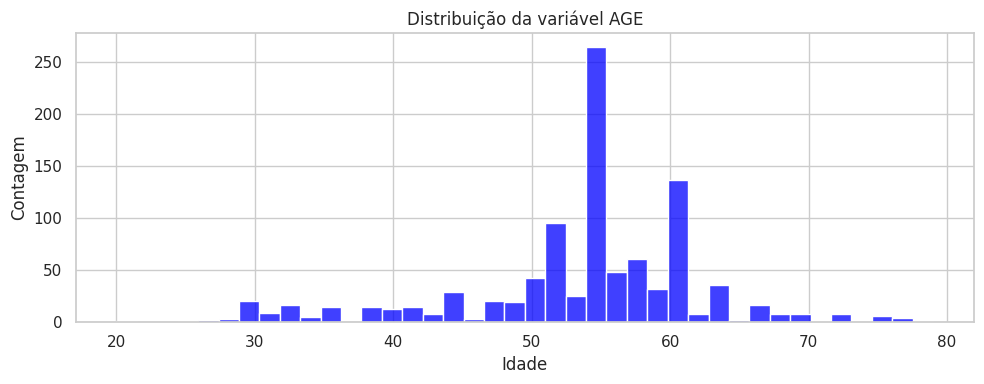

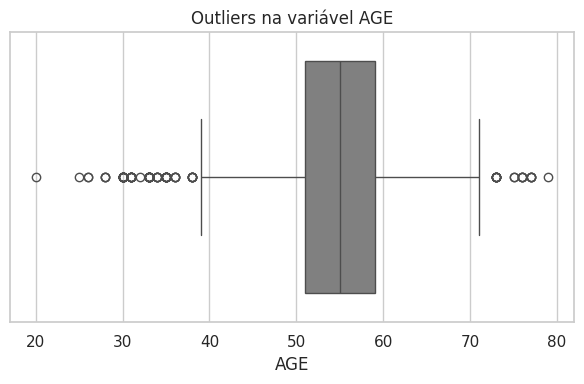

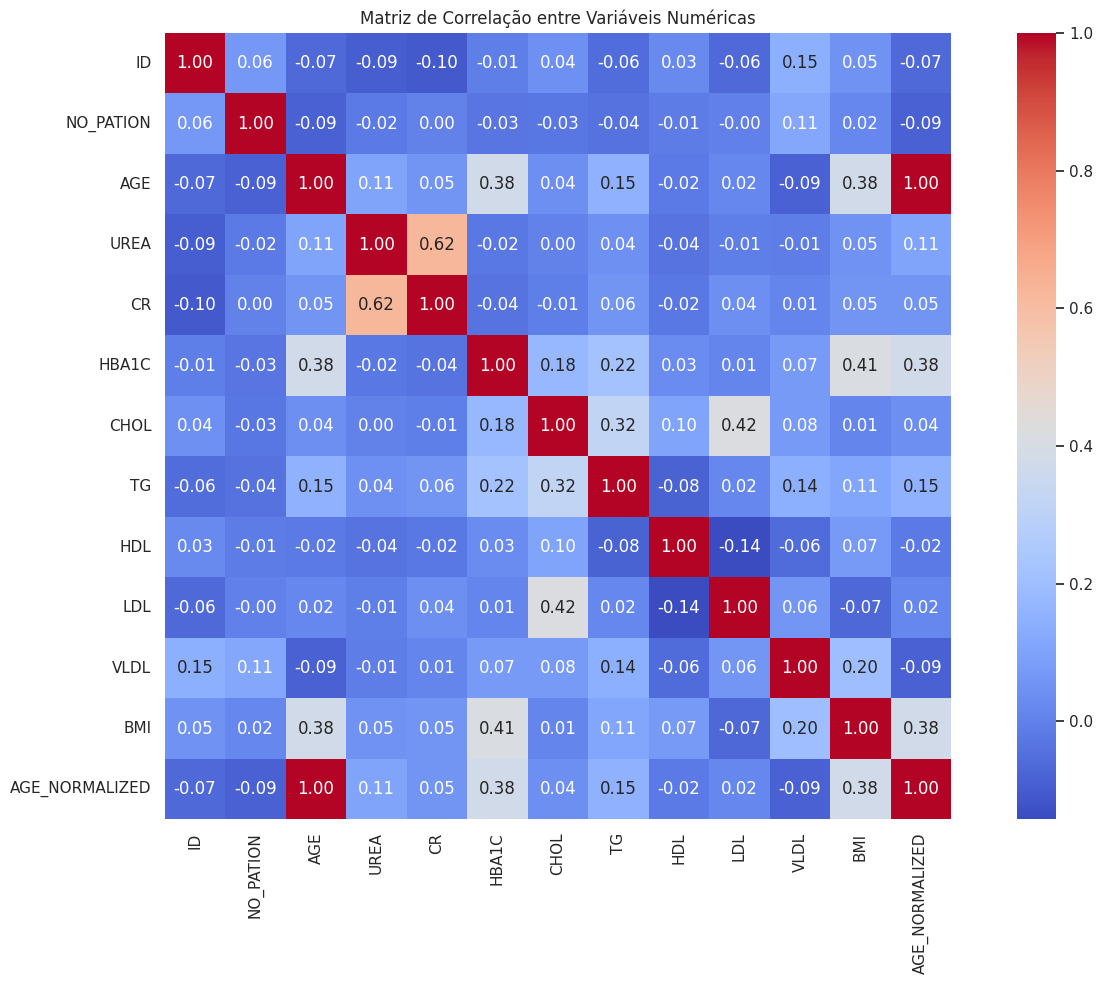

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Gráfico de barras com valores ausentes
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if not missing.empty:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=missing.values, y=missing.index, color="red")
    plt.title("Valores Ausentes por Coluna")
    plt.xlabel("Quantidade de Valores Nulos")
    plt.ylabel("Variável")
    plt.tight_layout()
    plt.show()
else:
    print("✅ Nenhum valor ausente encontrado no dataset.")

# 2. Gráfico de pizza para duplicatas
duplicados = df.duplicated().sum()
plt.figure(figsize=(4, 4))
plt.pie([duplicados, len(df) - duplicados], labels=["Duplicados", "Únicos"],
        autopct='%1.1f%%', colors=["orange", "lightblue"], startangle=90)
plt.title("Distribuição de Registros Duplicados")
plt.tight_layout()
plt.show()

# 3. Histograma da idade
plt.figure(figsize=(10, 4))
sns.histplot(df["AGE"], bins=40, color="blue")
plt.title("Distribuição da variável AGE")
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.tight_layout()
plt.show()

# 4. Boxplot da idade para análise de outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["AGE"], color="gray")
plt.title("Outliers na variável AGE")
plt.tight_layout()
plt.show()

# 5. Matriz de Correlação (numéricas)
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(),
            annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.tight_layout()
plt.show()


<ipython-input-35-e6f8bc932562>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette="Set2")


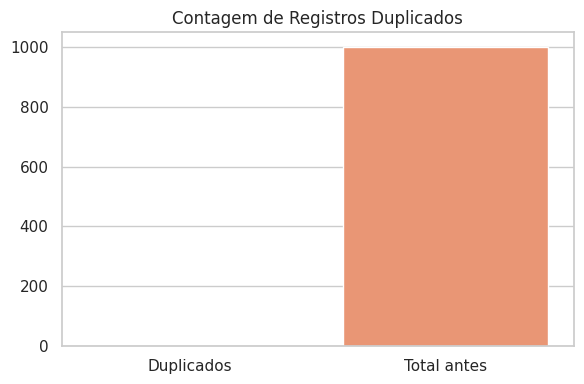

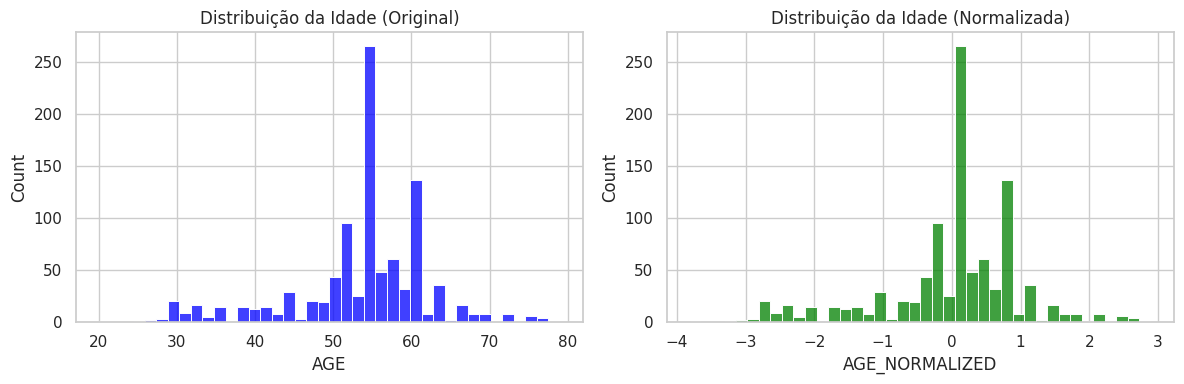

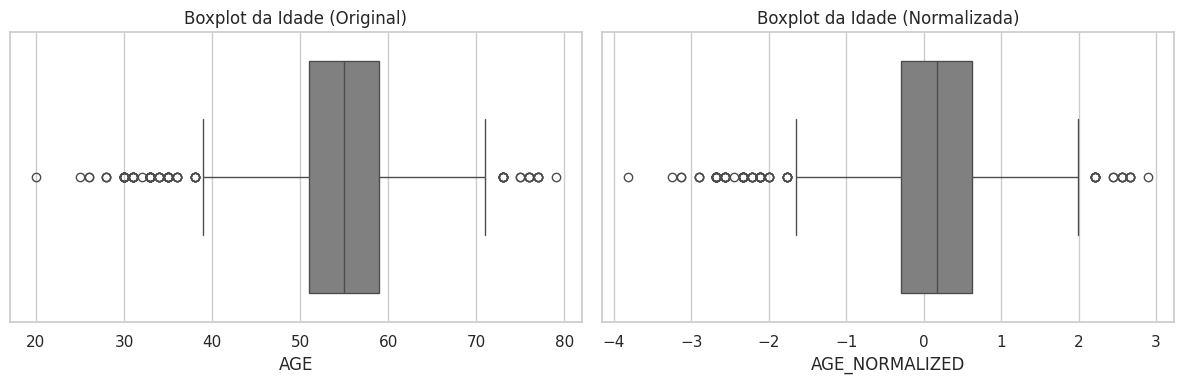

In [35]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Gráfico de antes/depois da remoção de duplicatas
plt.figure(figsize=(6, 4))
counts = [df.duplicated().sum(), len(df)]
labels = ["Duplicados", "Total antes"]
sns.barplot(x=labels, y=counts, palette="Set2")
plt.title("Contagem de Registros Duplicados")
plt.tight_layout()
plt.show()

# Remoção de duplicados
df = df.drop_duplicates()

# 2. Preenchimento de valores ausentes com mediana
df.fillna(df.median(numeric_only=True), inplace=True)

# 3. Codificação de variáveis categóricas
if "GENDER" in df.columns:
    df["GENDER"] = df["GENDER"].map({'F': 0, 'M': 1})

if "CLASS" in df.columns:
    le = LabelEncoder()
    df["CLASS_ENCODED"] = le.fit_transform(df["CLASS"])

# 4. Normalização da idade
scaler = StandardScaler()
df["AGE_NORMALIZED"] = scaler.fit_transform(df[["AGE"]])

# 5. Histogramas antes e depois da normalização
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df["AGE"], bins=40, color='blue')
plt.title("Distribuição da Idade (Original)")
plt.subplot(1, 2, 2)
sns.histplot(df["AGE_NORMALIZED"], bins=40, color='green')
plt.title("Distribuição da Idade (Normalizada)")
plt.tight_layout()
plt.show()

# 6. Boxplots antes e depois
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df["AGE"], color="gray")
plt.title("Boxplot da Idade (Original)")
plt.subplot(1, 2, 2)
sns.boxplot(x=df["AGE_NORMALIZED"], color="gray")
plt.title("Boxplot da Idade (Normalizada)")
plt.tight_layout()
plt.show()


Mapeamento das classes:
{'N': np.int64(0), 'P': np.int64(1), 'Y': np.int64(2)}


<ipython-input-36-7deb6e1afa3d>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_res_named, palette="Set2")


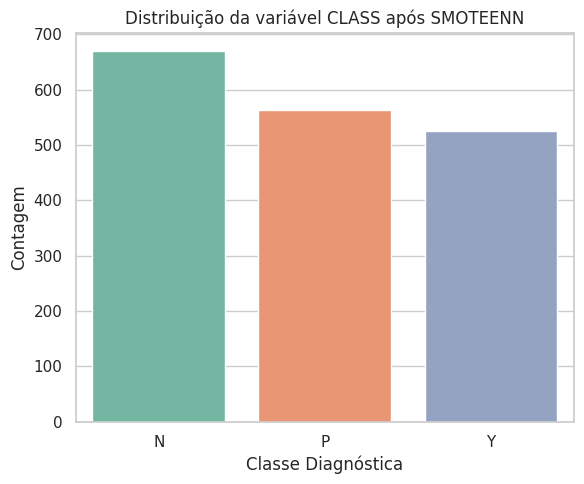

In [36]:
# Instalar a biblioteca caso ainda não esteja instalada
!pip install -q imbalanced-learn

# ===============================
# 1. LIMPEZA DA VARIÁVEL DE CLASSE
# ===============================
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Remover espaços em branco da variável CLASS
df['CLASS'] = df['CLASS'].astype(str).str.strip()

# Codificar a variável CLASS
le = LabelEncoder()
df['CLASS_ENCODED'] = le.fit_transform(df['CLASS'])

# Mostrar o mapeamento das classes
print("Mapeamento das classes:")
print(dict(zip(le.classes_, le.transform(le.classes_))))

# ===============================
# 2. TRATAMENTO DE VALORES NULOS
# ===============================
# Preenchendo NaNs com mediana (apenas em colunas numéricas)
df = df.fillna(df.median(numeric_only=True))

# ===============================
# 3. APLICAÇÃO DO SMOTEENN
# ===============================
from imblearn.combine import SMOTEENN

# Selecionar apenas variáveis numéricas para o X
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['CLASS_ENCODED'])
y = df['CLASS_ENCODED']

# Aplicar o SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X, y)

# ===============================
# 4. GERAR GRÁFICO DA DISTRIBUIÇÃO BALANCEADA
# ===============================
import seaborn as sns
import matplotlib.pyplot as plt

# Decodificar as classes balanceadas
y_res_named = le.inverse_transform(y_resampled)

# Plotar a nova distribuição
plt.figure(figsize=(6, 5))
sns.countplot(x=y_res_named, palette="Set2")
plt.title("Distribuição da variável CLASS após SMOTEENN")
plt.xlabel("Classe Diagnóstica")
plt.ylabel("Contagem")
plt.tight_layout()
plt.show()
